<a href="https://colab.research.google.com/github/DiegoAT11/module1_activities_DiegoAguilarTorres/blob/main/TelcoCustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Diego Aguilar Torres - A01657884
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Colab 6 Semestre/Jesus/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Leer CSV en DataFrame
df = pd.read_csv(file_path)

#Mostrar una preview de los datos
print("Preview del dataframe")
display(df.head(20))

Preview del dataframe


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# General Customer Profile

In [4]:
# Checamos el tipo de dato de las columnas del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Primero calculamos la media, mediana y moda de "Tenure", "MonthlyCharges" y "TotalCharges"

# Tenure
media_tenure = df["tenure"].mean()
mediana_tenure = df["tenure"].median()
moda_tenure = df["tenure"].mode()[0]

print("\nTenure:")
print(f"Media: {media_tenure:.2f}")
print(f"Mediana: {mediana_tenure:.2f}")
print(f"Moda: {moda_tenure:.2f}")

# MonthlyCharges
media_mc = df["MonthlyCharges"].mean()
mediana_mc = df["MonthlyCharges"].median()
moda_mc = df["MonthlyCharges"].mode()[0]

print("\nMonthly Charges:")
print(f"Media: {media_mc:.2f}")
print(f"Mediana: {mediana_mc:.2f}")
print(f"Moda: {moda_mc:.2f}")


# TotalCharges

# Pasamos "TotalCharges" a float
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna(subset=["TotalCharges"])


media_tc = df["TotalCharges"].mean()
mediana_tc = df["TotalCharges"].median()
moda_tc = df["TotalCharges"].mode()[0]

print("\nTotal Charges:")
print(f"Media: {media_tc:.2f}")
print(f"Mediana: {mediana_tc:.2f}")
print(f"Moda: {moda_tc:.2f}")



Tenure:
Media: 32.37
Mediana: 29.00
Moda: 1.00

Monthly Charges:
Media: 64.76
Mediana: 70.35
Moda: 20.05

Total Charges:
Media: 2283.30
Mediana: 1397.47
Moda: 20.20


de que la tenure media y mediana, podemos ver que el cliente típico de la empresa esta en alredodr de 2 años y medio, osea ese tiempo duran en esto.


In [6]:
# Ahora pasamos a calcular el rango, varianza y desviación estandar

# Tenure
rango_tenure = df["tenure"].max() - df["tenure"].min()
varianza_tenure = np.var(df["tenure"], ddof=1)
ds_tenure = np.std(df["tenure"],  ddof=1)

print("\nTenure:")
print(f"Rango: {rango_tenure}")
print(f"Varianza: {varianza_tenure:.2f}")
print(f"Desviación estándar: {ds_tenure:.2f}")

# MonthlyCharges
rango_mc = df["MonthlyCharges"].max() - df["MonthlyCharges"].min()
varianza_mc = np.var(df["MonthlyCharges"], ddof=1)
ds_mc = np.std(df["MonthlyCharges"],  ddof=1)

print("\nMonthly Charges:")
print(f"Rango: {rango_mc}")
print(f"Varianza: {varianza_mc:.2f}")
print(f"Desviación estándar: {ds_mc:.2f}")


# TotalCharges
rango_tc = df["TotalCharges"].max() - df["TotalCharges"].min()
varianza_tc = np.var(df["TotalCharges"], ddof=1)
ds_tc = np.std(df["TotalCharges"],  ddof=1)


print("\nTotal Charges:")
print(f"Rango: {rango_tc}")
print(f"Varianza: {varianza_tc:.2f}")
print(f"Desviación estándar: {ds_tc:.2f}")


Tenure:
Rango: 71
Varianza: 602.47
Desviación estándar: 24.55

Monthly Charges:
Rango: 100.5
Varianza: 905.17
Desviación estándar: 30.09

Total Charges:
Rango: 8666.0
Varianza: 5138252.41
Desviación estándar: 2266.77


In [7]:
# Calculamos el rango intercuartílico (IQR)

# Tenure
Q1_tenure = np.percentile(df["tenure"], 25)
Q2_tenure = np.percentile(df["tenure"], 50)
Q3_tenure = np.percentile(df["tenure"], 75)
IQR_tenure = Q3_tenure - Q1_tenure

print("\n---Tenure---")
print(f"Q1 (25th Percentile): {Q1_tenure:.4f}")
print(f"Q2 (Median / 50th Percentile): {Q2_tenure:.4f}")
print(f"Q3 (75th Percentile): {Q3_tenure:.4f}")
print(f"IQR (Interquartile Range): {IQR_tenure:.4f}")


# MonthlyCharges
Q1_mc= np.percentile(df["MonthlyCharges"], 25)
Q2_mc = np.percentile(df["MonthlyCharges"], 50)
Q3_mc = np.percentile(df["MonthlyCharges"], 75)
IQR_mc = Q3_mc - Q1_mc

print("\n---Monthly Charges---")
print(f"Q1 (25th Percentile): {Q1_mc:.4f}")
print(f"Q2 (Median / 50th Percentile): {Q2_mc:.4f}")
print(f"Q3 (75th Percentile): {Q3_mc:.4f}")
print(f"IQR (Interquartile Range): {IQR_mc:.4f}")


# TotalCharges
Q1_tc= np.percentile(df["TotalCharges"], 25)
Q2_tc = np.percentile(df["TotalCharges"], 50)
Q3_tc = np.percentile(df["TotalCharges"], 75)
IQR_tc = Q3_tc - Q1_tc

print("\n---Total Charges---")
print(f"Q1 (25th Percentile): {Q1_tc:.4f}")
print(f"Q2 (Median / 50th Percentile): {Q2_tc:.4f}")
print(f"Q3 (75th Percentile): {Q3_tc:.4f}")
print(f"IQR (Interquartile Range): {IQR_tc:.4f}")


---Tenure---
Q1 (25th Percentile): 9.0000
Q2 (Median / 50th Percentile): 29.0000
Q3 (75th Percentile): 55.0000
IQR (Interquartile Range): 46.0000

---Monthly Charges---
Q1 (25th Percentile): 35.5875
Q2 (Median / 50th Percentile): 70.3500
Q3 (75th Percentile): 89.8625
IQR (Interquartile Range): 54.2750

---Total Charges---
Q1 (25th Percentile): 401.4500
Q2 (Median / 50th Percentile): 1397.4750
Q3 (75th Percentile): 3794.7375
IQR (Interquartile Range): 3393.2875


Comparando la media y la mediana de permanencia, ¿cómo describirías al cliente “típico” de la empresa?
- Analizando los resultados, el cliente típico tiene una permanencia de aproximadamente 29 meses (mediana). La media más alta (32,42) indica que algunos clientes llevan mucho tiempo, mientras que la moda de 1 mes refleja que hay muchos clientes nuevos. Por lo tanto, se puede concluir que un cliente típico permanece alrededor de 2 años y medio con la empresa.

# Distribution Visualization


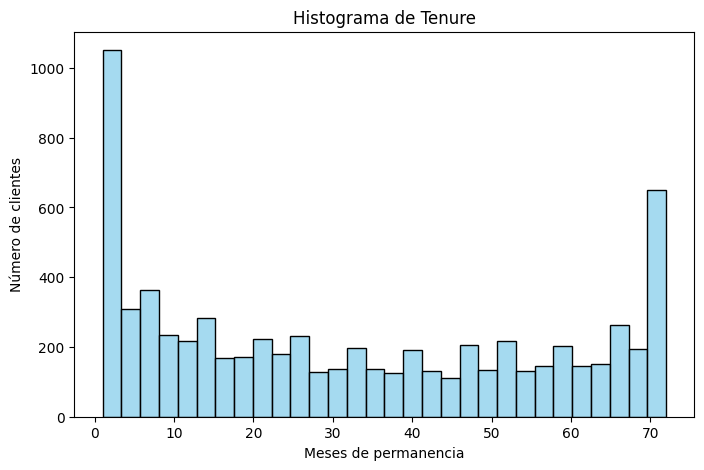

In [8]:
# Histograma de Tenure
plt.figure(figsize=(8,5))
sns.histplot(df["tenure"], bins=30, color='skyblue')
plt.title("Histograma de Tenure")
plt.xlabel("Meses de permanencia")
plt.ylabel("Número de clientes")
plt.show()

In [9]:
skewness_tenure = df["tenure"].skew()
print(f"Skewness de Tenure: {skewness_tenure:.4f}")

Skewness de Tenure: 0.2377


¿Son simétricos o sesgados? ¿Qué patrones o picos interesantes observas?
- La distribución de la permanencia de clientes es casi simétrica, con un leve sesgo positivo.
- Respecto a los picos, podemos ver un pico principal en clientes con menos de un año de permanencia, reflejando un alto nivel de deserción temprana, y un segundo pico alrededor de los 70 meses, correspondiente a clientes muy leales que llevan varios años con la empresa.

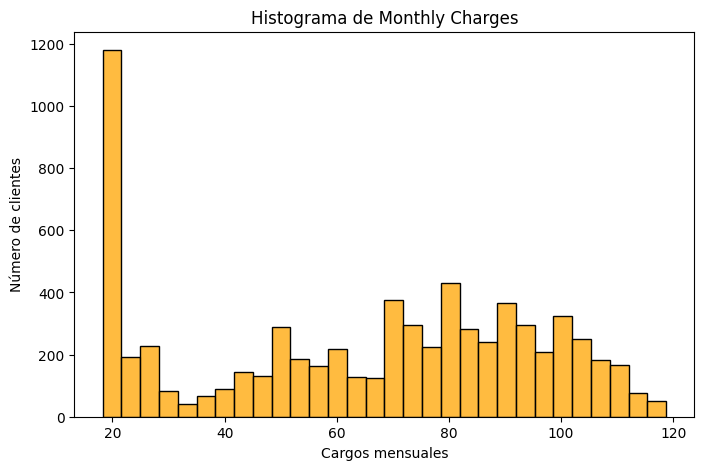

In [10]:
# Histograma de Monthly Charges
plt.figure(figsize=(8,5))
sns.histplot(df["MonthlyCharges"], bins=30, color='orange')
plt.title("Histograma de Monthly Charges")
plt.xlabel("Cargos mensuales")
plt.ylabel("Número de clientes")
plt.show()

In [11]:
skewness_mc = df["MonthlyCharges"].skew()
print(f"Skewness de Monthly Charges: {skewness_mc:.4f}")

Skewness de Monthly Charges: -0.2221


¿Son simétricos o sesgados? ¿Qué patrones o picos interesantes observas?
- La distribución de los cargos mensuales es casi simétrica, con un leve sesgo negativo.
- El histograma muestra un pico principal en los cargos más bajos, lo que indica que la mayoría de los clientes elige el plan básico. Además, se observa otro grupo importante de clientes en el rango de 70 a 90 dólares, probablemente correspondiente a un plan intermedio. Finalmente, se aprecia que muy pocos clientes pagan más de 100 dólares, lo que indica que los planes premium son de los menos solicitados.

# Segment Analysis (Churn vs. No Churn)

In [12]:
median_values_tenure = df.groupby("Churn")[["tenure"]].median()

print("---Mediana de tenure---")
print(median_values_tenure)

---Mediana de tenure---
       tenure
Churn        
No       38.0
Yes      10.0


- Los clientes que se van suelen haber estado poco tiempo en la empresa, lo que indica que se están llevando a cabo ciertas acciones que no resultan atractivas para los clientes más nuevos.
- Los clientes leales (No Churn) tienen una permanencia mucho mayor, lo que indica que la retención aumenta con el tiempo.

In [13]:
median_values_mc = df.groupby("Churn")[["MonthlyCharges"]].median()

print("---Mediana de MonthlyCharges---")
print(median_values_mc)

---Mediana de MonthlyCharges---
       MonthlyCharges
Churn                
No              64.45
Yes             79.65


- Los clientes que pagan más mensualmente tienden a cancelar con mayor frecuencia, lo que podría indicar cierta insatisfacción con lo que ofrecen los planes más costosos.
- Los clientes con planes más baratos tienen más probabilidad de quedarse,  sugiriendo que están conformes con lo que ofrecen.

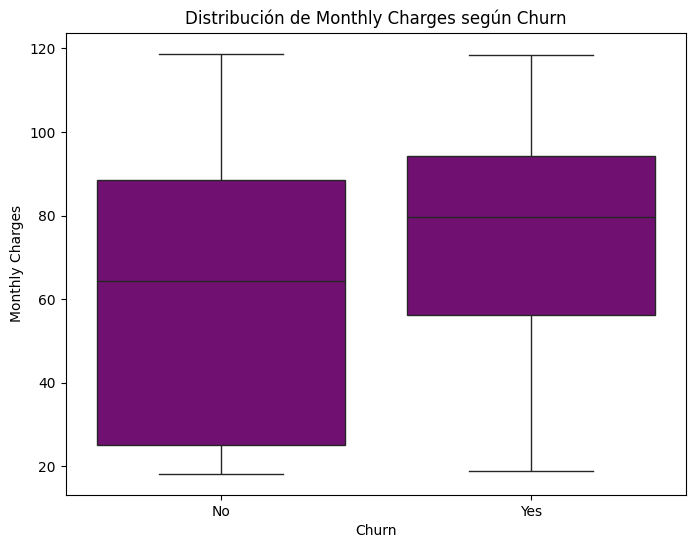

In [14]:
# Box Plot de Monthly Charges
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, color='purple')
plt.title('Distribución de Monthly Charges según Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

La mayoría de los clientes que cancelan tienen cargos altos, mientras que quienes permanecen se distribuyen más entre planes de bajo y mediano costo. Aunque ambos grupos presentan algunos clientes con cargos muy altos, no hay muchos outliers. Por lo tanto, podemos concluir que la retención de clientes premium debe ser una prioridad, ya que representan un mayor riesgo de churn.